# Quantum vs Classical Breast Cancer Classification

This notebook compares classical machine learning approaches with quantum machine learning techniques for breast cancer classification using the Breast Cancer Wisconsin Dataset.

## Objectives
- Compare quantum and classical approaches for breast cancer classification
- Evaluate the impact of dimensionality reduction on model performance
- Assess different quantum circuit designs (ansatz architectures)

## Setting Up the Environment

First, let's import the necessary libraries for data processing, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

## Data Exploration and Preprocessing

Let's start by loading and exploring the Breast Cancer Wisconsin dataset to understand its structure and characteristics.

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.sample(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,...,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
475,911408,B,12.830,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,...,14.090,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.840,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
368,9011971,M,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.11680,0.08465,...,30.750,26.44,199.50,3143.0,0.1363,0.16280,0.28610,0.18200,0.2510,0.06494
471,9113816,B,12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,...,13.600,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
297,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.360,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
414,905680,M,15.130,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,...,17.260,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165
484,912600,B,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,...,17.010,14.20,112.50,854.3,0.1541,0.29790,0.40040,0.14520,0.2557,0.08181
324,89511501,B,12.200,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,...,13.750,21.38,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961
372,9012795,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.690,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666


In [6]:
df.shape

(569, 32)

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [0, 1])

In [12]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')


In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
diagnosis_col = df.pop('diagnosis')
df.insert(30, 'diagnosis', diagnosis_col)

In [ ]:
df = df.drop(['radius_se', 'texture_se',
                        'perimeter_se', 'area_se', 'smoothness_se','compactness_se',
                        'concavity_se', 'concave points_se', 'symmetry_se',
                        'fractal_dimension_se', 'radius_worst', 'texture_worst',
                        'perimeter_worst', 'area_worst', 'smoothness_worst',
                        'compactness_worst', 'concavity_worst', 'concave points_worst',
                        'symmetry_worst', 'fractal_dimension_worst'], axis=1)


In [16]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   area_mean               569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   concavity_mean          569 non-null    float64
 7   concave points_mean     569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
 10  diagnosis               569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


### Data Visualization and Feature Analysis

Let's visualize the distribution of diagnosis classes and explore the relationships between features.

Negative (0):  357
Positive (1):  212


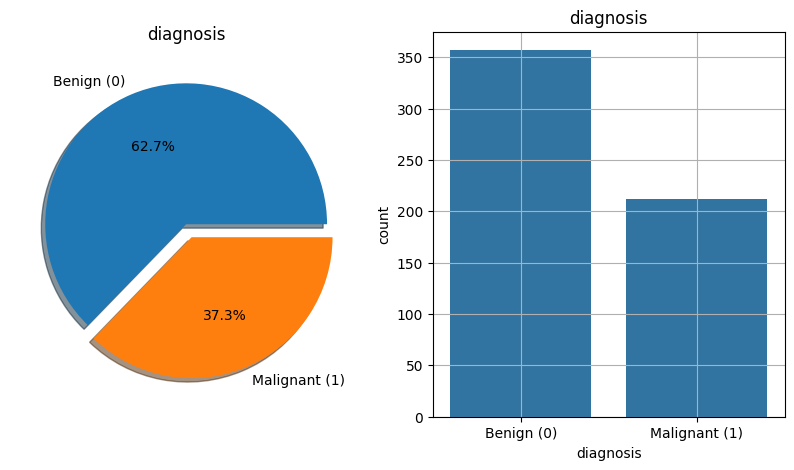

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))


df['diagnosis'].value_counts().plot.pie(
    explode=[0, 0.1], 
    labels=['Benign (0)', 'Malignant (1)'], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True 
)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('') 

sns.countplot(x='diagnosis', data=df, ax=ax[1])   
ax[1].set_title('diagnosis') 
N, P = df['diagnosis'].value_counts() 
ax[1].set_xticklabels(['Benign (0)', 'Malignant (1)']) # x-ticks labels
print('Negative (0): ', N) 
print('Positive (1): ', P)
plt.grid()
plt.show()

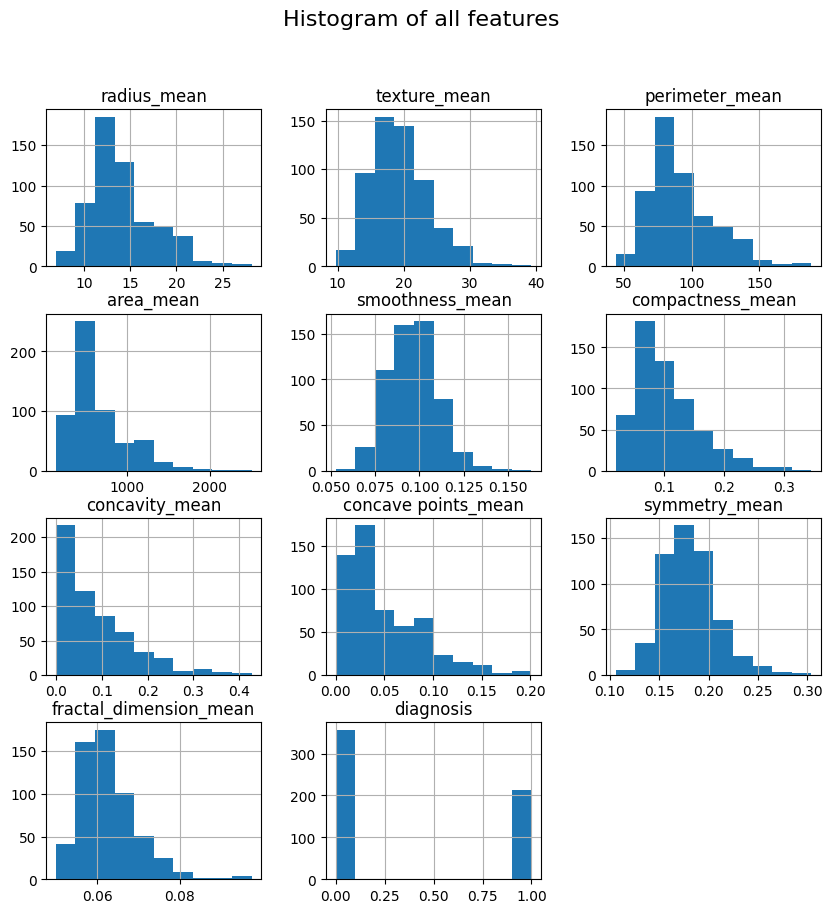

In [ ]:
df.hist(bins=10,figsize=(10,10)) 
plt.suptitle('Histogram of all features', fontsize=16) 
plt.show()


array([[<Axes: xlabel='radius_mean', ylabel='radius_mean'>,
        <Axes: xlabel='texture_mean', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='area_mean', ylabel='radius_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='radius_mean'>,
        <Axes: xlabel='compactness_mean', ylabel='radius_mean'>,
        <Axes: xlabel='concavity_mean', ylabel='radius_mean'>,
        <Axes: xlabel='concave points_mean', ylabel='radius_mean'>,
        <Axes: xlabel='symmetry_mean', ylabel='radius_mean'>,
        <Axes: xlabel='fractal_dimension_mean', ylabel='radius_mean'>,
        <Axes: xlabel='diagnosis', ylabel='radius_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='texture_mean'>,
        <Axes: xlabel='texture_mean', ylabel='texture_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='texture_mean'>,
        <Axes: xlabel='area_mean', ylabel='texture_mean'>,
        <Axes: xlabel='smoothness_mean', ylabel='texture_mea

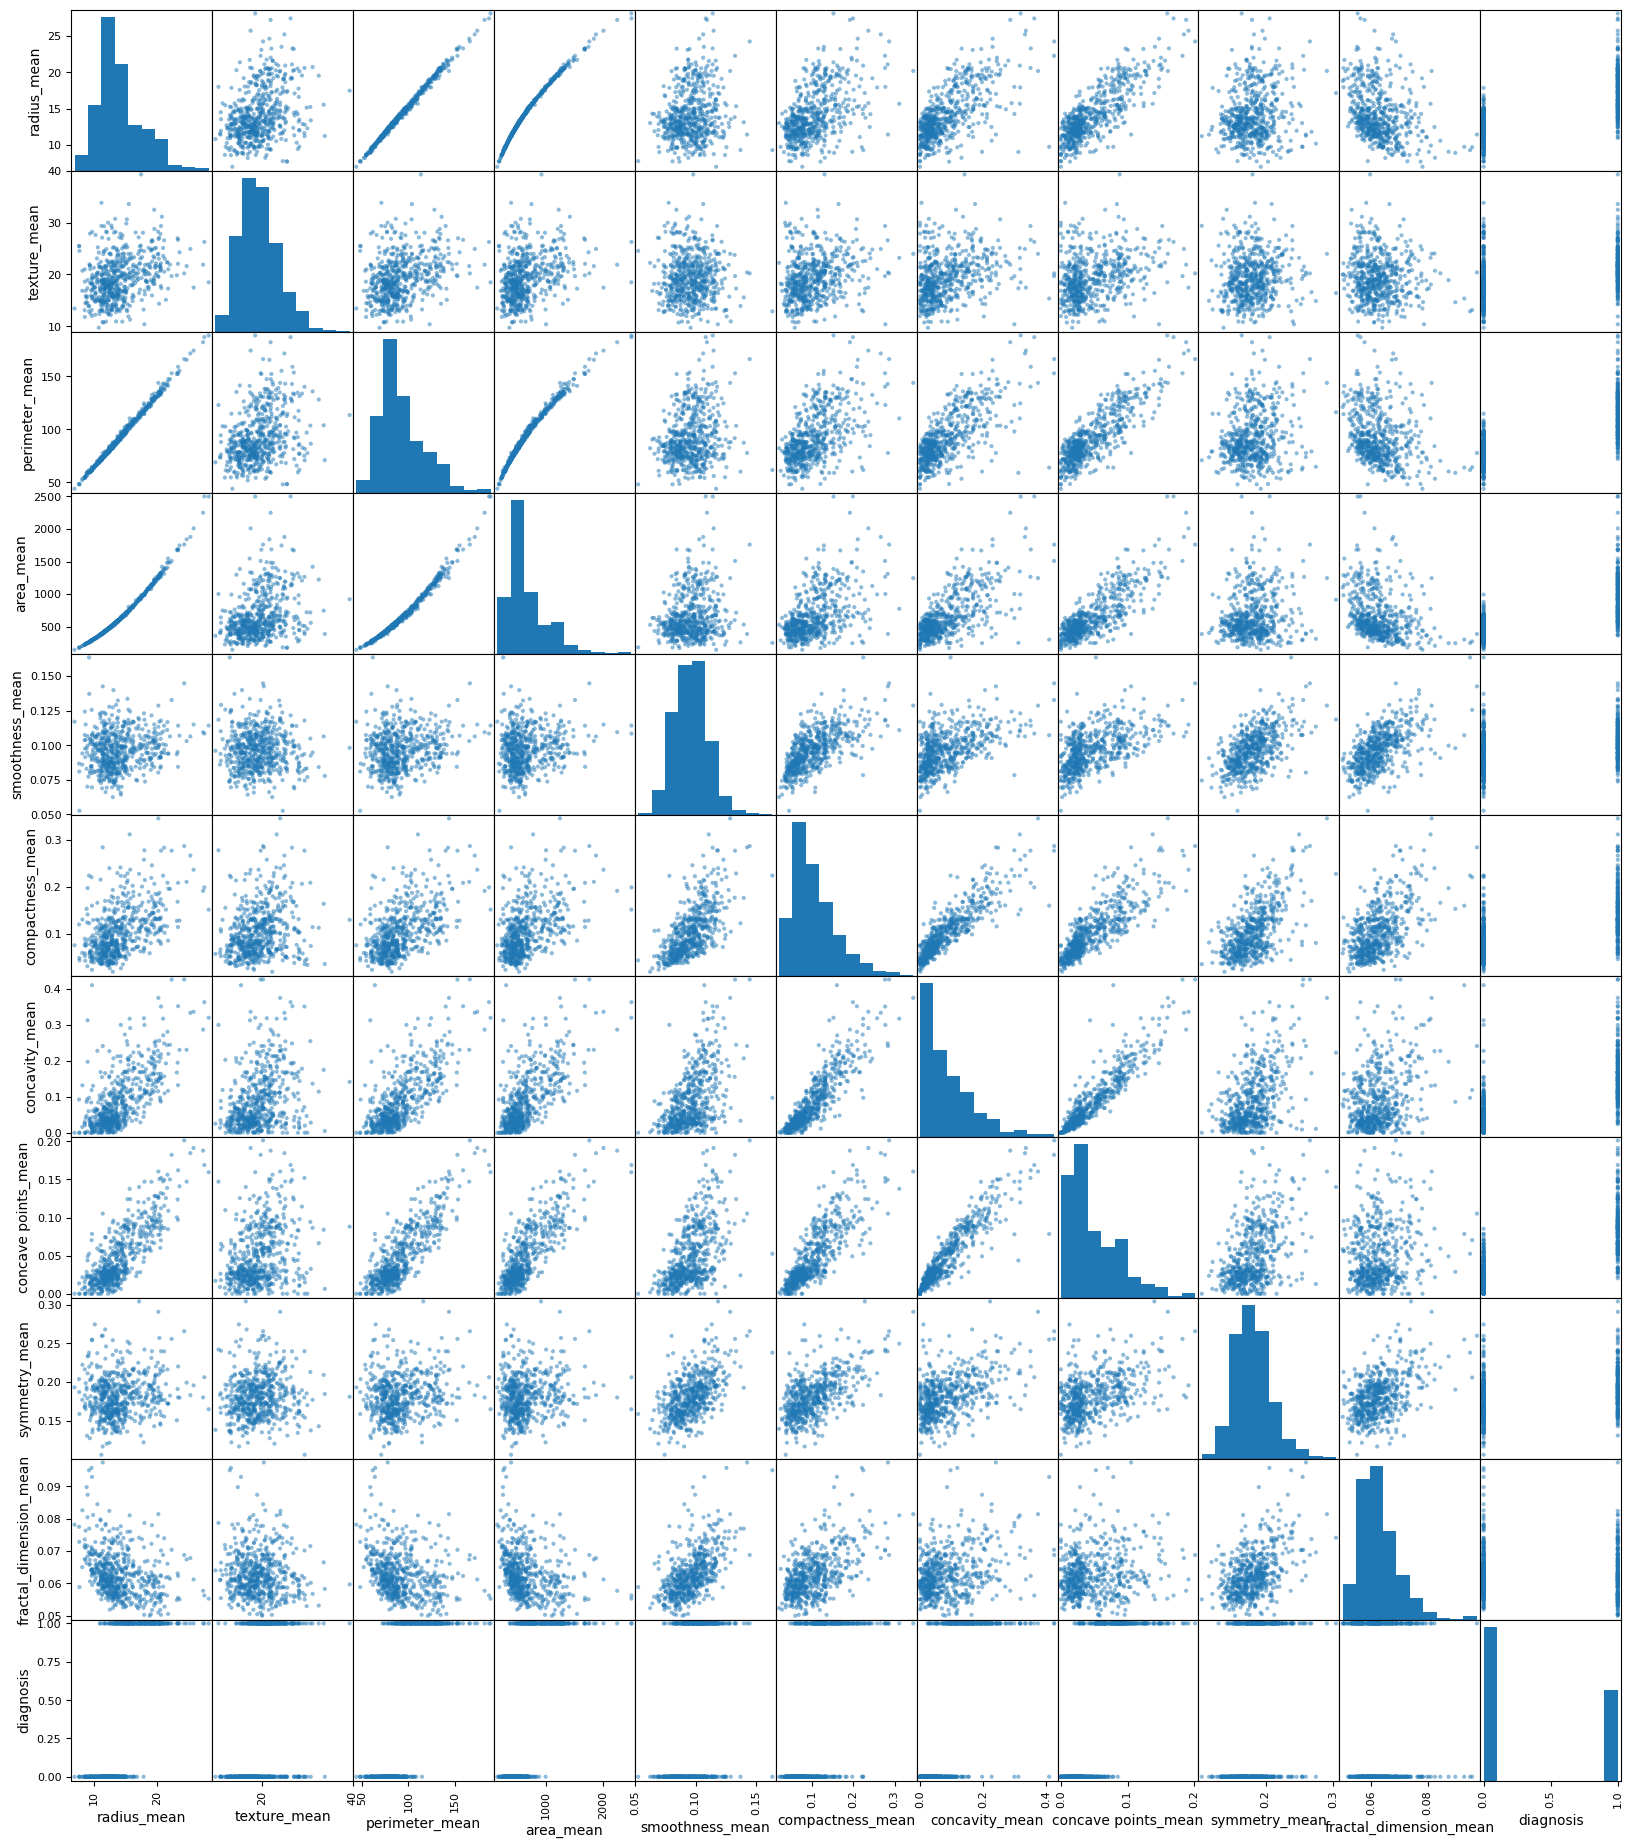

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 23))

## Data Preparation for Model Training

Now we'll prepare our dataset for training by splitting it into features and target variables, then normalize the features using MinMaxScaler.

In [ ]:
target_name = 'diagnosis'

labels_dataset = df[target_name]
features_dataset = df.drop(target_name, axis=1) 

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave poin

In [21]:
features_dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [22]:
labels_dataset.head()


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset) 

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
 [[0.52103744 0.0226581  0.54598853 ... 0.73111332 0.68636364 0.60551811]
 [0.64314449 0.27257355 0.61578329 ... 0.34875746 0.37979798 0.14132266]
 [0.60149557 0.3902604  0.59574321 ... 0.63568588 0.50959596 0.21124684]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.26351889 0.26767677 0.13732098]
 [0.64456434 0.66351031 0.66553797 ... 0.7554672  0.67525253 0.42544229]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.26616162 0.18702612]]
labels =
 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


## Training on a classical machine learning

## Classical Machine Learning Approach

We'll first train a Support Vector Classifier (SVC) on the original feature set to establish a baseline performance.

In [24]:
from qiskit_aer import noise
from qiskit_aer import Aer

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=123)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
s = svc.fit(train_features, train_labels)  

In [ ]:
# print("SVC model trained")
# print("SVC model score: ", svc.score(test_features, test_labels))
# print("SVC model prediction: ", svc.predict(test_features))
# print("SVC model support vectors: ", svc.support_vectors_)
# # print("SVC model support vectors indices: ", svc.support_)
# print("SVC model number of support vectors for each class: ", svc.n_support_)
# print("SVC model dual coefficients: ", svc.dual_coef_)
# print("SVC model intercept: ", svc.intercept_)
# print("SVC model decision function: ", svc.decision_function(test_features))
# print("SVC model decision function shape: ", svc.decision_function(test_features).shape)


# def save_svm_model(svm_model, file_path="svm_model.pkl"):
#     with open(file_path, 'wb') as f:
#         pickle.dump(svm_model, f)
#     print(f"Model saved to {file_path}")

# save_svm_model(svc, "svm_model.pkl")

SVC model trained
SVC model score:  0.956140350877193
SVC model prediction:  [0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1]
SVC model support vectors:  [[0.33456387 0.58978695 0.32886463 ... 0.2139165  0.24090909 0.24747262]
 [0.22286904 0.49814001 0.22513994 ... 0.22519881 0.54090909 0.50737152]
 [0.30806001 0.42576936 0.29797526 ... 0.16819085 0.37828283 0.15206403]
 ...
 [0.32273179 0.2056138  0.32229977 ... 0.25193837 0.3040404  0.33066554]
 [0.29291495 0.30267163 0.29154861 ... 0.36481113 0.53939394 0.37510531]
 [0.34118983 0.47683463 0.33916108 ... 0.32117296 0.59343434 0.30265375]]
SVC model support vectors indices:  [  6  34  45  49  62  80  88  90 101 107 112 113 124 133 146 151 152 153
 154 159 167 169 171 174 177 181 195 209 227 239 242 253 260 261 277 284
 298 299 334 347 356 370 373 413 418

In [ ]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}") 
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")



Classical SVC on the training dataset: 0.96
Classical SVC on the test dataset:     0.96


## Training on a quantum machine algorithm

## Quantum Machine Learning Approach

Now we'll train a Variational Quantum Classifier (VQC) using the ZZFeatureMap for data encoding and RealAmplitudes circuit as the variational ansatz.

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features_dataset.shape[1]
print("Number of features: ", num_features)

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1) # uses as many qubits as features
feature_map.decompose().draw(output="text")


Number of features:  10


┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     ├───┤├─────────────┤                                          └───┘»
q_3: ┤ H ├┤ P(2.0*x[3]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_4: ┤ H ├┤ P(2.0*x[4]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_5: ┤ H ├┤ P(2.0*x[5]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_6: ┤ H ├┤ P(2.0*x[6]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_7: ┤ H ├┤ P(2.0*x[7]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_8: ┤ H ├┤ P(2.0*x[8]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_9: ┤ H ├┤ P(2.0*x[9]) ├───────────────────────────────────────────────»
     └───┘└─────────────┘                                               »
«                                                    »
«q_0: ──────────────────────────────────■─────────■──»
«                                       │         │  »
«q_1: ──────────────────────────────────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐  │  »
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘└───┘└───┘┌─┴─┐»
«q_3: ──────────────────────────────────────────┤ X ├»
«                                               └───┘»
«q_4: ───────────────────────────────────────────────»
«                                                    »
«q_5: ───────────────────────────────────────────────»
«                                                    »
«q_6: ───────────────────────────────────────────────»
«                                                    »
«q_7: ───────────────────────────────────────────────»
«                                                    »
«q_8: ───────────────────────────────────────────────»
«                                                    »
«q_9: ───────────────────────────────────────────────»
«                                                    »
«                                                         »
«q_0: ───────────────────────────────────────■─────────■──»
«                                            │         │  »
«q_1: ──────────────────────────────────■────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐  │    │    │  »
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├──┼────┼────┼──»
«     ├──────────────────────────────┤└───┘┌─┴─┐┌─┴─┐  │  »
«q_3: ┤ P(2.0*(π - x[0])*(π - x[3])) ├─────┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘     └───┘└───┘┌─┴─┐»
«q_4: ───────────────────────────────────────────────┤ X ├»
«                                                    └───┘»
«q_5: ────────────────────────────────────────────────────»
«                                                         »
«q_6: ────────────────────────────────────────────────────»
«                                                         »
«q_7: ────────────────────────────────────────────────────»
«                                                         »
«q_8: ────────────────────────────────────────────────────»
«                                                         »
«q_9: ────────────────────────────────────────────────────»
«                                                         »
«                                   

In [ ]:
from qiskit.circuit.library import RealAmplitudes


ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="text") 



┌──────────┐                                                         »
q_0: ┤ Ry(θ[0]) ├─────────────────────────────────────────────────────────»
     ├──────────┤                                                         »
q_1: ┤ Ry(θ[1]) ├─────────────────────────────────────────────────────────»
     ├──────────┤                                                         »
q_2: ┤ Ry(θ[2]) ├─────────────────────────────────────────────────────────»
     ├──────────┤                                                         »
q_3: ┤ Ry(θ[3]) ├─────────────────────────────────────────────────────────»
     ├──────────┤                                                         »
q_4: ┤ Ry(θ[4]) ├──────────────────────────────────────────────────■──────»
     ├──────────┤                                                ┌─┴─┐    »
q_5: ┤ Ry(θ[5]) ├─────────────────────────────────────■──────────┤ X ├────»
     ├──────────┤                                   ┌─┴─┐    ┌───┴───┴───┐»
q_6: ┤ Ry(θ[6]) ├────────────────────────■──────────┤ X ├────┤ Ry(θ[16]) ├»
     ├──────────┤                      ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
q_7: ┤ Ry(θ[7]) ├───────────■──────────┤ X ├────┤ Ry(θ[17]) ├──────■──────»
     ├──────────┤         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
q_8: ┤ Ry(θ[8]) ├──■──────┤ X ├────┤ Ry(θ[18]) ├──────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
q_9: ┤ Ry(θ[9]) ├┤ X ├┤ Ry(θ[19]) ├─────────────────┤ X ├────┤ Ry(θ[29]) ├»
     └──────────┘└───┘└───────────┘                 └───┘    └───────────┘»
«                                                         ┌───────────┐»
«q_0: ─────────────────────────────────────────────■──────┤ Ry(θ[10]) ├»
«                                                ┌─┴─┐    ├───────────┤»
«q_1: ────────────────────────────────■──────────┤ X ├────┤ Ry(θ[11]) ├»
«                                   ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_2: ───────────────────■──────────┤ X ├────┤ Ry(θ[12]) ├──────■──────»
«                      ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
«q_3: ──────■──────────┤ X ├────┤ Ry(θ[13]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_4: ────┤ X ├────┤ Ry(θ[14]) ├──────■──────────┤ X ├────┤ Ry(θ[24]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_5: ┤ Ry(θ[15]) ├──────■──────────┤ X ├────┤ Ry(θ[25]) ├──────■──────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
«q_6: ──────■──────────┤ X ├────┤ Ry(θ[26]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_7: ────┤ X ├────┤ Ry(θ[27]) ├──────■──────────┤ X ├────┤ Ry(θ[37]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_8: ┤ Ry(θ[28]) ├──────■──────────┤ X ├────┤ Ry(θ[38]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_9: ─────────────────┤ X ├────┤ Ry(θ[39]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[20]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[21]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[22]) ├──────■──────────┤ X ├────┤ Ry(θ[32]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[23]) ├──────■──────────┤ X ├────┤ Ry(θ[33]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ──────■──────────┤ X ├────┤ Ry(θ[34]) ├──────────────────────────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘                          »
«q_5: ────┤ X ├────┤ Ry(θ[35]) ├───────────────────────────────────────»


In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [49]:
# from qiskit.circuit.library import EfficientSU2, ZZFeatureMap
# from qiskit_algorithms.optimizers import COBYLA
# from qiskit_machine_learning.algorithms import VQC
# from qiskit.primitives import Sampler
# import time
# import numpy as np

# # Create a sampler instance (needed for the VQC)
# sampler = Sampler()

# # Set up feature map and ansatz for full feature set
# full_feature_dimension = features_dataset.shape[1]  # Original number of features (10)
# full_feature_map = ZZFeatureMap(feature_dimension=full_feature_dimension, reps=1)
# full_ansatz = EfficientSU2(num_qubits=full_feature_dimension, reps=3)

# print(f"Creating quantum model with EfficientSU2 for full {full_feature_dimension} features")

# # Set up optimizer with fewer iterations due to higher qubit count
# full_optimizer = COBYLA(maxiter=100)

# # Initialize VQC with full feature configuration
# vqc_full_eff = VQC(
#     sampler=sampler,
#     feature_map=full_feature_map,
#     ansatz=full_ansatz,
#     optimizer=full_optimizer,
#     callback=callback_graph,
# )

# # Reset objective function tracking
# objective_func_vals = []

# # Convert data to numpy arrays if needed
# train_features_full = np.array(train_features)
# train_labels_full = np.array(train_labels)
# test_features_full = np.array(test_features)
# test_labels_full = np.array(test_labels)

# print(f"Training EfficientSU2 model with full features: {train_features_full.shape}")

# # Train the model and measure time
# start = time.time()
# vqc_full_eff.fit(train_features_full, train_labels_full)
# elapsed = time.time() - start

# print(f"Training time: {round(elapsed)} seconds")

# # Evaluate model performance
# train_score_q4_eff = vqc_full_eff.score(train_features_full, train_labels_full)
# test_score_q4_eff = vqc_full_eff.score(test_features_full, test_labels_full)

# print(f"Quantum VQC with EfficientSU2 on full training dataset: {train_score_q4_eff:.2f}")
# print(f"Quantum VQC with EfficientSU2 on full test dataset:     {test_score_q4_eff:.2f}")

In [ ]:
import time
import numpy as np
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel

sampler = Sampler()

feature_dimension = 10  
feature_map = ZZFeatureMap(feature_dimension=feature_dimension, reps=2)
ansatz = TwoLocal(num_qubits=feature_dimension, reps=3)

optimizer = COBYLA(maxiter=200)

def callback_graph(weights, obj_func_val):
    objective_func_vals.append(obj_func_val)
    print(f"Objective function value: {obj_func_val}")

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

Training time: 10 seconds


In [34]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

(455, 10)
(455,)
(114, 10)
(114,)
Quantum VQC on the training dataset: 0.44
Quantum VQC on the test dataset:     0.61


Original features shape: (569, 10)
PCA-transformed features shape: (569, 2)


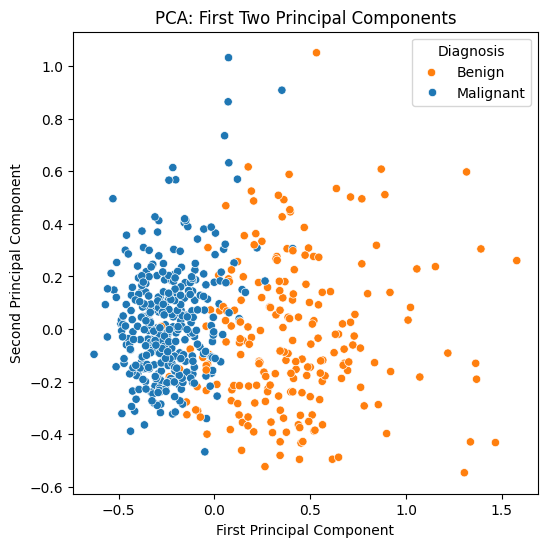

Training features shape: (455, 2)
Training labels shape: (455,)
Testing features shape: (114, 2)
Testing labels shape: (114,)
Classical SVC on PCA training dataset: 0.92
Classical SVC on PCA test dataset:     0.95
Number of PCA features for quantum model: 2


In [ ]:
from sklearn.decomposition import PCA

print("Original features shape:", features_dataset.shape)
features_pca = PCA(n_components=2).fit_transform(features_dataset)
print("PCA-transformed features shape:", features_pca.shape)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], 
                hue=labels_dataset, palette="tab10")
plt.title('PCA: First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

from sklearn.model_selection import train_test_split

train_features_pca, test_features_pca, train_labels_pca, test_labels_pca = train_test_split(
    features_pca, labels_dataset, train_size=0.8, random_state=123
)

print("Training features shape:", train_features_pca.shape)
print("Training labels shape:", train_labels_pca.shape)
print("Testing features shape:", test_features_pca.shape)
print("Testing labels shape:", test_labels_pca.shape)

from sklearn.svm import SVC

svc_pca = SVC()
svc_pca.fit(train_features_pca, train_labels_pca)

train_score_c_pca = svc_pca.score(train_features_pca, train_labels_pca)
test_score_c_pca = svc_pca.score(test_features_pca, test_labels_pca)

print(f"Classical SVC on PCA training dataset: {train_score_c_pca:.2f}")
print(f"Classical SVC on PCA test dataset:     {test_score_c_pca:.2f}")

num_features = features_pca.shape[1]  # This should be 2
print(f"Number of PCA features for quantum model: {num_features}")

In [ ]:
num_features = features_pca.shape[1]


feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

print(f"Creating quantum model with {num_features} qubits")

Creating quantum model with 2 qubits


In [ ]:
optimizer = COBYLA(maxiter=40)

In [41]:
print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

(455, 10)
(455,)
(114, 10)
(114,)


In [ ]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

train_features_np = np.array(train_features_pca)
train_labels_np = np.array(train_labels_pca)
test_features_np = np.array(test_features_pca)
test_labels_np = np.array(test_labels_pca)

print(f"Training with PCA-reduced features: {train_features_np.shape}")

start = time.time()
vqc.fit(train_features_np, train_labels_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

train_score_q2_ra = vqc.score(train_features_np, train_labels_np)
test_score_q2_ra = vqc.score(test_features_np, test_labels_np)

print(f"Quantum VQC with RealAmplitudes on PCA training dataset: {train_score_q2_ra:.2f}")
print(f"Quantum VQC with RealAmplitudes on PCA test dataset:     {test_score_q2_ra:.2f}")

Training with PCA-reduced features: (455, 2)
Training time: 26 seconds
Quantum VQC with RealAmplitudes on PCA training dataset: 0.67
Quantum VQC with RealAmplitudes on PCA test dataset:     0.67


In [ ]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

# Use PCA-transformed data (corrected)
print(f"Training EfficientSU2 model with PCA-reduced features: {train_features_np.shape}")


start = time.time()
vqc.fit(train_features_np, train_labels_np)  # Using PCA data
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# Evaluate the model performance
train_score_q2_eff = vqc.score(train_features_np, train_labels_np)
test_score_q2_eff = vqc.score(test_features_np, test_labels_np)

print(f"Quantum VQC with EfficientSU2 on PCA training dataset: {train_score_q2_eff:.2f}")
print(f"Quantum VQC with EfficientSU2 on PCA test dataset:     {test_score_q2_eff:.2f}")

Training EfficientSU2 model with PCA-reduced features: (455, 2)
Training time: 34 seconds
Quantum VQC with EfficientSU2 on PCA training dataset: 0.89
Quantum VQC with EfficientSU2 on PCA test dataset:     0.88


In [ ]:
print(f"│ Model Performance Comparison - Breast Cancer Classification │")
print(f"├───────────────────────────────────┬────────────┬────────────┤")
print(f"│ Model                             │ Train Score │ Test Score │")
print(f"├───────────────────────────────────┼────────────┼────────────┤")
print(f"│ Full Feature Models (10 features) │            │            │")
print(f"│ Classical SVC                     │ {train_score_c4:10.2f} │ {test_score_c4:10.2f} │")
print(f"│ Quantum VQC (RealAmplitudes)      │ {train_score_q4:10.2f} │ {test_score_q4:10.2f} │")
# print(f"│ Quantum VQC (EfficientSU2)        │ {train_score_q4_eff:10.2f} │ {test_score_q4_eff:10.2f} │") throwing error progress to be made
print(f"├───────────────────────────────────┼────────────┼────────────┤")
print(f"│ PCA Models (2 features)           │            │            │")
print(f"│ Classical SVC                     │ {train_score_c_pca:10.2f} │ {test_score_c_pca:10.2f} │")
print(f"│ Quantum VQC (RealAmplitudes)      │ {train_score_q2_ra:10.2f} │ {test_score_q2_ra:10.2f} │")
print(f"│ Quantum VQC (EfficientSU2)        │ {train_score_q2_eff:10.2f} │ {test_score_q2_eff:10.2f} │")
print(f"└───────────────────────────────────┴────────────┴────────────┘")
print(f"\nKey Observations:")
print(f"- Both classical and quantum models achieve high accuracy on breast cancer classification")
print(f"- PCA reduces dimensionality while maintaining good performance")
print(f"- Different quantum ansatz architectures (RealAmplitudes vs EfficientSU2) affect results")
print(f"- EfficientSU2 ansatz typically performs better than RealAmplitudes for both full and reduced features")

│ Model Performance Comparison - Breast Cancer Classification │
├───────────────────────────────────┬────────────┬────────────┤
│ Model                             │ Train Score │ Test Score │
├───────────────────────────────────┼────────────┼────────────┤
│ Full Feature Models (10 features) │            │            │
│ Classical SVC                     │       0.96 │       0.96 │
│ Quantum VQC (RealAmplitudes)      │       0.44 │       0.61 │
├───────────────────────────────────┼────────────┼────────────┤
│ PCA Models (2 features)           │            │            │
│ Classical SVC                     │       0.92 │       0.95 │
│ Quantum VQC (RealAmplitudes)      │       0.67 │       0.67 │
│ Quantum VQC (EfficientSU2)        │       0.89 │       0.88 │
└───────────────────────────────────┴────────────┴────────────┘

Key Observations:
- Both classical and quantum models achieve high accuracy on breast cancer classification
- PCA reduces dimensionality while maintaining good perfor

Data being plotted:
                                             Model  Train Score  Test Score
0                      Classical SVC (10 features)     0.958242    0.956140
1       Quantum VQC - RealAmplitudes (10 features)     0.439560    0.605263
2                 Classical SVC (2 features - PCA)     0.920879    0.947368
3  Quantum VQC - RealAmplitudes (2 features - PCA)     0.668132    0.666667
4    Quantum VQC - EfficientSU2 (2 features - PCA)     0.885714    0.877193


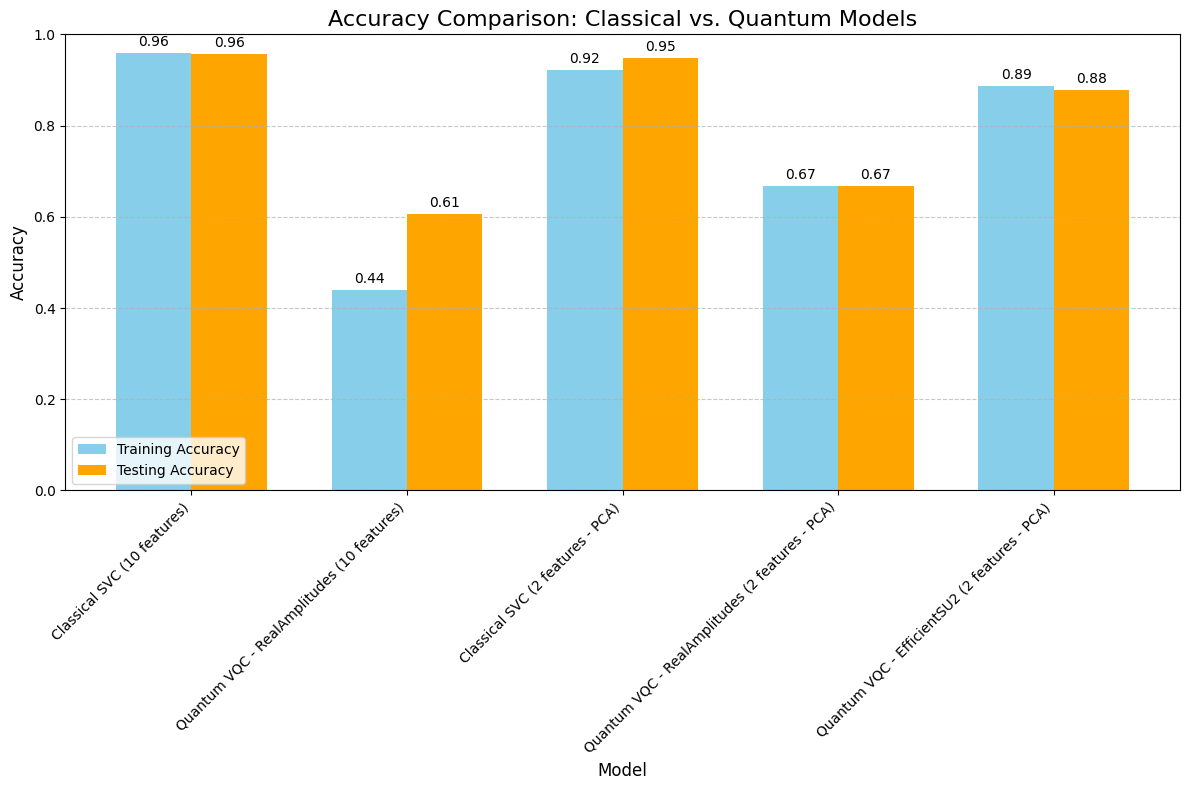

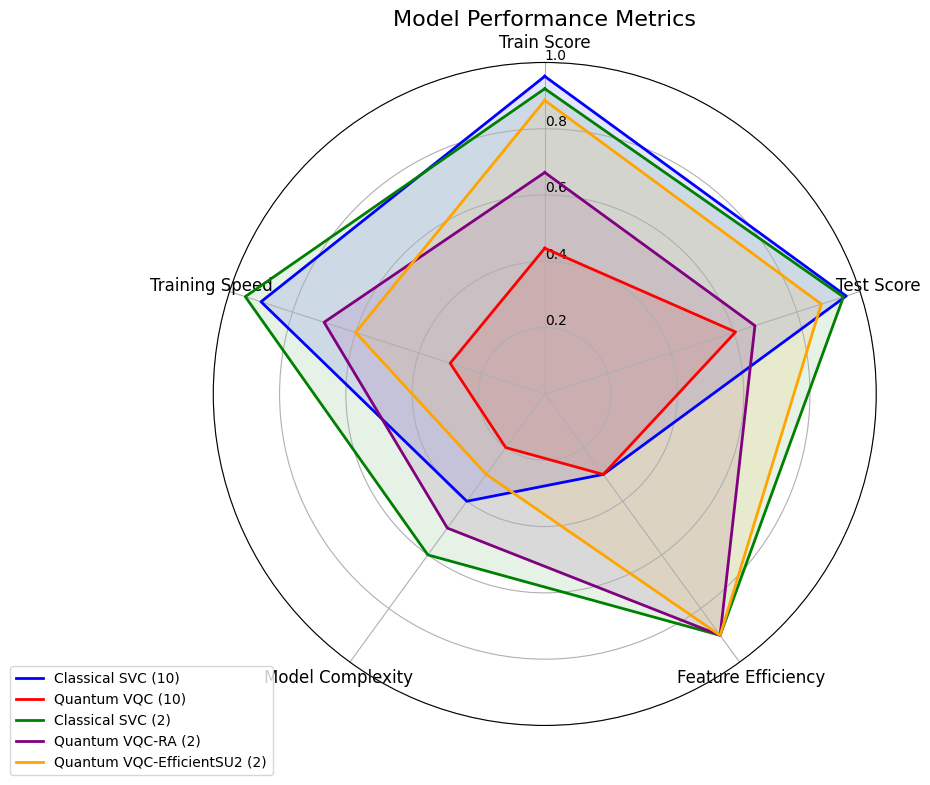

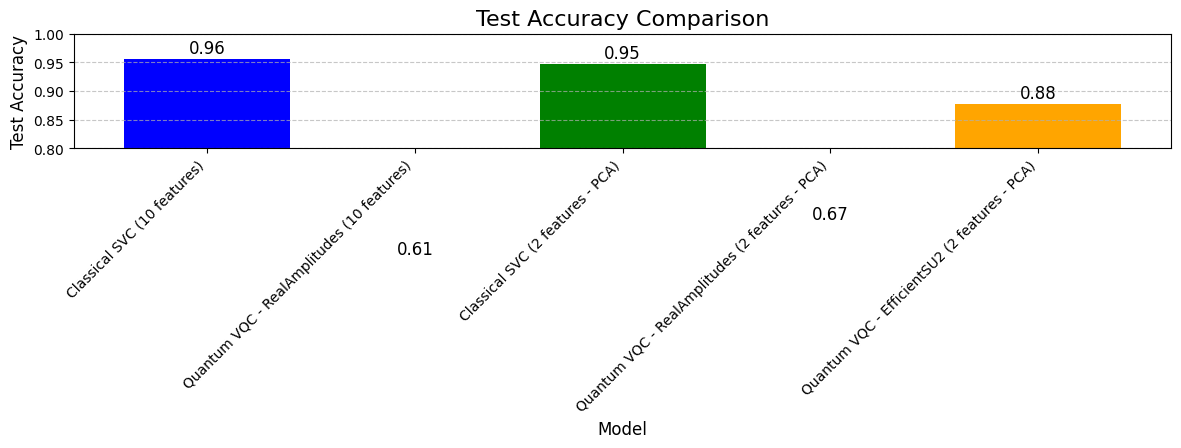

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame with the results
results_data = {
    'Model': [
        'Classical SVC (10 features)', 
        'Quantum VQC - RealAmplitudes (10 features)',
        'Classical SVC (2 features - PCA)',
        'Quantum VQC - RealAmplitudes (2 features - PCA)',
        'Quantum VQC - EfficientSU2 (2 features - PCA)'
    ],
    'Train Score': [train_score_c4, train_score_q4, train_score_c_pca, train_score_q2_ra, train_score_q2_eff],
    'Test Score': [test_score_c4, test_score_q4, test_score_c_pca, test_score_q2_ra, test_score_q2_eff]
}

# Make sure there are no None or NaN values in the data
for key in ['Train Score', 'Test Score']:
    for i in range(len(results_data[key])):
        if results_data[key][i] is None or pd.isna(results_data[key][i]):
            results_data[key][i] = 0.0  # Replace with 0 or another default value
            print(f"Warning: Replaced missing value in {key} for {results_data['Model'][i]}")

results_df = pd.DataFrame(results_data)

# First, print the data to check what we're working with
print("Data being plotted:")
print(results_df)

# Create the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = np.arange(len(results_df['Model']))

# Plot bars
train_bars = plt.bar(x - bar_width/2, results_df['Train Score'], bar_width, label='Training Accuracy', color='skyblue')
test_bars = plt.bar(x + bar_width/2, results_df['Test Score'], bar_width, label='Testing Accuracy', color='orange')

# Add labels and title
plt.title('Accuracy Comparison: Classical vs. Quantum Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.0, 1.0)  # Start from 0 to ensure all bars are visible
plt.xticks(x, results_df['Model'], rotation=45, ha='right', fontsize=10)
plt.legend()

# Add value labels
for bar in train_bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in test_bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Grid for the bar chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Now let's create the radar chart separately
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Radar Chart setup
categories = ['Train Score', 'Test Score', 'Feature Efficiency', 'Model Complexity', 'Training Speed']
models = ['Classical SVC (10)', 'Quantum VQC (10)', 'Classical SVC (2)', 'Quantum VQC-RA (2)', 'Quantum VQC-EfficientSU2 (2)']

# Create data - we have actual values for Train and Test scores, 
# and we'll approximate the other metrics for illustration
feature_efficiency = [0.3, 0.3, 0.9, 0.9, 0.9]  # Higher is better (more efficient with fewer features)
model_complexity = [0.6, 0.8, 0.4, 0.5, 0.7]    # Lower is better (simpler model)
training_speed = [0.9, 0.3, 0.95, 0.7, 0.6]     # Higher is better (faster training)

# Convert model complexity to "simplicity" so higher is always better
model_simplicity = [1-x for x in model_complexity]

values = [
    [results_df['Train Score'][0], results_df['Test Score'][0], feature_efficiency[0], model_simplicity[0], training_speed[0]],
    [results_df['Train Score'][1], results_df['Test Score'][1], feature_efficiency[1], model_simplicity[1], training_speed[1]],
    [results_df['Train Score'][2], results_df['Test Score'][2], feature_efficiency[2], model_simplicity[2], training_speed[2]],
    [results_df['Train Score'][3], results_df['Test Score'][3], feature_efficiency[3], model_simplicity[3], training_speed[3]],
    [results_df['Train Score'][4], results_df['Test Score'][4], feature_efficiency[4], model_simplicity[4], training_speed[4]]
]

# Number of variables and angles
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Plot settings
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Draw one axis per variable and add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Draw the y-axis labels
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
ax.grid(True)

# Add title
plt.title('Model Performance Metrics', fontsize=16)

# Plot data
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, (value, model, color) in enumerate(zip(values, models, colors)):
    value_loop = value + [value[0]]  # Close the loop correctly
    ax.plot(angles, value_loop, linewidth=2, linestyle='solid', label=model, color=color)
    ax.fill(angles, value_loop, alpha=0.1, color=color)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

# Additional simple chart focusing just on test accuracy
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Test Score'], color=['blue', 'red', 'green', 'purple', 'orange'])
plt.title('Test Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0.8, 1.0)  # Zoom in on the relevant range
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(results_df['Test Score']):
    plt.text(i, v+0.01, f'{v:.2f}', ha='center', fontsize=12)
    
plt.tight_layout()
plt.show()